# Analisa Performa Gold Bike Shop


## Load_dan_Bersihkan Data
Data terdiri dari 3 file:
* Data penjualan: `sales_fact.csv`
* Data pelanggan: `customer_reports_fixed.csv`
* Data produk: `product_reports_fixed.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8-deep')

### Data penjualan

In [3]:
sales_fact = pd.read_csv("/content/drive/MyDrive/Datasets/gold_bike_shop/fact_sales.csv")

In [4]:
sales_fact.head()

,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25
1,SO54496,289,5400,2013-03-16,2013-03-23,2013-03-28,5,1,5
2,SO54496,259,5400,2013-03-16,2013-03-23,2013-03-28,2,1,2
3,SO54497,174,9281,2013-03-16,2013-03-23,2013-03-28,22,1,22
4,SO54497,280,9281,2013-03-16,2013-03-23,2013-03-28,9,1,9


In [5]:
sales_fact.columns

Index(['order_number', 'product_key', 'customer_key', 'order_date',
       'shipping_date', 'due_date', 'sales_amount', 'quantity', 'price'],
      dtype='object')

In [6]:
sales_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_number   60398 non-null  object
 1   product_key    60398 non-null  int64 
 2   customer_key   60398 non-null  int64 
 3   order_date     60379 non-null  object
 4   shipping_date  60398 non-null  object
 5   due_date       60398 non-null  object
 6   sales_amount   60398 non-null  int64 
 7   quantity       60398 non-null  int64 
 8   price          60398 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 4.1+ MB


In [7]:
sales_fact_copy = sales_fact.copy()

In [8]:
sales_fact_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_number   60398 non-null  object
 1   product_key    60398 non-null  int64 
 2   customer_key   60398 non-null  int64 
 3   order_date     60379 non-null  object
 4   shipping_date  60398 non-null  object
 5   due_date       60398 non-null  object
 6   sales_amount   60398 non-null  int64 
 7   quantity       60398 non-null  int64 
 8   price          60398 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 4.1+ MB


In [9]:
sales_fact_copy["order_date"] = pd.to_datetime(sales_fact["order_date"])
sales_fact_copy["shipping_date"] = pd.to_datetime(sales_fact["shipping_date"])
sales_fact_copy["due_date"] = pd.to_datetime(sales_fact["due_date"])
sales_fact_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   60398 non-null  object        
 1   product_key    60398 non-null  int64         
 2   customer_key   60398 non-null  int64         
 3   order_date     60379 non-null  datetime64[ns]
 4   shipping_date  60398 non-null  datetime64[ns]
 5   due_date       60398 non-null  datetime64[ns]
 6   sales_amount   60398 non-null  int64         
 7   quantity       60398 non-null  int64         
 8   price          60398 non-null  int64         
dtypes: datetime64[ns](3), int64(5), object(1)
memory usage: 4.1+ MB


In [10]:
sales_fact_copy.duplicated().sum()

np.int64(0)

In [11]:
sales_fact_copy[["order_date", "shipping_date", "due_date"]].agg(["min", "max"])

,order_date,shipping_date,due_date
min,2010-12-29,2011-01-05,2011-01-10
max,2014-01-28,2014-02-04,2014-02-09


### Data Pelanggan

In [12]:
customer_data = pd.read_csv("/content/drive/MyDrive/Datasets/gold_bike_shop/customer_reports_fixed.csv")

In [13]:
customer_data.head(10)

,customer_key,customer_number,customer_name,age,country,age_group,lifespan,customer_class,first_order,last_order,since_last_order,total_orders,total_sales,total_quantity,total_product,average_order_value,average_monthly_spend
0,1,AW00011000,Jon Yang,53.0,Australia,50-59,27,VIP,2011-01-19,2013-05-03,147,3,8249,8,8,2749.67,305.5185
1,2,AW00011001,Eugene Huang,49.0,Australia,40-49,34,VIP,2011-01-15,2013-12-10,140,3,6384,11,10,2128.00,187.7647
2,3,AW00011002,Ruben Torres,54.0,Australia,50-59,25,VIP,2011-01-07,2013-02-23,150,3,8114,4,4,2704.67,324.5600
3,4,AW00011003,Christy Zhu,52.0,Australia,50-59,28,VIP,2010-12-29,2013-05-10,147,3,8139,9,9,2713.00,290.6786
4,5,AW00011004,Elizabeth Johnson,46.0,Australia,40-49,27,VIP,2011-01-23,2013-05-01,148,3,8196,6,6,2732.00,303.5556
5,6,AW00011005,Julio Ruiz,49.0,Australia,40-49,28,VIP,2010-12-30,2013-05-02,147,3,8121,6,6,2707.00,290.0357
6,7,AW00011006,Janet Alvarez,48.0,Australia,40-49,27,VIP,2011-01-24,2013-05-14,147,3,8119,5,5,2706.33,300.7037
7,8,AW00011007,Marco Mehta,55.0,Australia,50-59,26,VIP,2011-01-09,2013-03-19,149,3,8211,8,8,2737.00,315.8077
8,9,AW00011008,Rob Verhoff,50.0,Australia,50-59,25,VIP,2011-01-25,2013-03-02,149,3,8106,7,7,2702.00,324.2400
9,10,AW00011009,Shannon Carlson,55.0,Australia,50-59,27,VIP,2011-01-27,2013-05-09,147,3,8091,5,5,2697.00,299.6667


In [14]:
customer_data.columns

Index(['customer_key', 'customer_number', 'customer_name', 'age', 'country',
       'age_group', 'lifespan', 'customer_class', 'first_order', 'last_order',
       'since_last_order', 'total_orders', 'total_sales', 'total_quantity',
       'total_product', 'average_order_value', 'average_monthly_spend'],
      dtype='object')

In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18482 entries, 0 to 18481
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_key           18482 non-null  int64  
 1   customer_number        18482 non-null  object 
 2   customer_name          18482 non-null  object 
 3   age                    18465 non-null  float64
 4   country                18145 non-null  object 
 5   age_group              18482 non-null  object 
 6   lifespan               18482 non-null  int64  
 7   customer_class         18482 non-null  object 
 8   first_order            18482 non-null  object 
 9   last_order             18482 non-null  object 
 10  since_last_order       18482 non-null  int64  
 11  total_orders           18482 non-null  int64  
 12  total_sales            18482 non-null  int64  
 13  total_quantity         18482 non-null  int64  
 14  total_product          18482 non-null  int64  
 15  av

In [16]:
customer_data_copy = customer_data.copy()

In [17]:
customer_data_copy["first_order"] = pd.to_datetime(customer_data_copy["first_order"])
customer_data_copy["last_order"] = pd.to_datetime(customer_data_copy["last_order"])

customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18482 entries, 0 to 18481
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_key           18482 non-null  int64         
 1   customer_number        18482 non-null  object        
 2   customer_name          18482 non-null  object        
 3   age                    18465 non-null  float64       
 4   country                18145 non-null  object        
 5   age_group              18482 non-null  object        
 6   lifespan               18482 non-null  int64         
 7   customer_class         18482 non-null  object        
 8   first_order            18482 non-null  datetime64[ns]
 9   last_order             18482 non-null  datetime64[ns]
 10  since_last_order       18482 non-null  int64         
 11  total_orders           18482 non-null  int64         
 12  total_sales            18482 non-null  int64         
 13  t

In [18]:
customer_data_copy[["first_order", "last_order"]].agg(["min", "max"])

,first_order,last_order
min,2010-12-29,2010-12-29
max,2014-01-28,2014-01-28


In [19]:
customer_data_copy.loc[customer_data_copy["first_order"] == "2014-01-28"]

,customer_key,customer_number,customer_name,age,country,age_group,lifespan,customer_class,first_order,last_order,since_last_order,total_orders,total_sales,total_quantity,total_product,average_order_value,average_monthly_spend
2671,2672,AW00013671,Frank Ramos,46.0,Germany,40-49,0,New Customer,2014-01-28,2014-01-28,139,1,135,4,4,135.0,135.0
2753,2754,AW00013753,Rebecca Nicholls,62.0,United States,60 and Above,0,New Customer,2014-01-28,2014-01-28,139,1,85,3,3,85.0,85.0
3029,3030,AW00014029,Christina Morris,43.0,United States,40-49,0,New Customer,2014-01-28,2014-01-28,139,1,57,2,2,57.0,57.0
3114,3115,AW00014114,Chloe Martin,48.0,United States,40-49,0,New Customer,2014-01-28,2014-01-28,139,1,86,2,2,86.0,86.0
3474,3475,AW00014474,Jacqueline Murphy,58.0,United States,50-59,0,New Customer,2014-01-28,2014-01-28,139,1,7,2,2,7.0,7.0
4160,4161,AW00015160,Candace Van,78.0,United States,60 and Above,0,New Customer,2014-01-28,2014-01-28,139,1,99,4,4,99.0,99.0
6150,6152,AW00017151,Jasmine Alexander,65.0,United States,60 and Above,0,New Customer,2014-01-28,2014-01-28,139,1,13,2,2,13.0,13.0
7528,7530,AW00018529,Albert Castro,59.0,United States,50-59,0,New Customer,2014-01-28,2014-01-28,139,1,40,2,2,40.0,40.0
8071,8073,AW00019072,Tamara Lu,65.0,United Kingdom,60 and Above,0,New Customer,2014-01-28,2014-01-28,139,1,49,3,3,49.0,49.0
8892,8894,AW00019893,Evan Baker,62.0,United States,60 and Above,0,New Customer,2014-01-28,2014-01-28,139,1,120,2,2,120.0,120.0


In [20]:
customer_data_copy.duplicated().sum()

np.int64(0)

### Data Produk

In [21]:
product_data = pd.read_csv("/content/drive/MyDrive/Datasets/gold_bike_shop/product_reports_fixed.csv")

In [22]:
product_data.head()

,product_key,product_name,category,subcategory,cost,last_order,since_last_order,product_class,lifespan,total_orders,total_sales,total_quantity,total_customer,average_order_value,average_order_revenue,average_monthly_revenue
0,3,Mountain-100 Black- 38,Bikes,Mountain Bikes,1898,2011-12-27,165,High-Performer,11,49,165375,49,49,3375.0,3375.0,15034.0909
1,4,Mountain-100 Black- 42,Bikes,Mountain Bikes,1898,2011-12-27,165,High-Performer,11,45,151875,45,45,3375.0,3375.0,13806.8182
2,5,Mountain-100 Black- 44,Bikes,Mountain Bikes,1898,2011-12-21,165,High-Performer,11,60,202500,60,60,3375.0,3375.0,18409.0909
3,6,Mountain-100 Black- 48,Bikes,Mountain Bikes,1898,2011-12-26,165,High-Performer,11,57,192375,57,57,3375.0,3375.0,17488.6364
4,7,Mountain-100 Silver- 38,Bikes,Mountain Bikes,1912,2011-12-22,165,High-Performer,11,58,197200,58,58,3400.0,3400.0,17927.2727


In [23]:
product_data.columns

Index(['product_key', 'product_name', 'category', 'subcategory', 'cost',
       'last_order', 'since_last_order', 'product_class', 'lifespan',
       'total_orders', 'total_sales', 'total_quantity', 'total_customer',
       'average_order_value', 'average_order_revenue',
       'average_monthly_revenue'],
      dtype='object')

In [24]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_key              130 non-null    int64  
 1   product_name             130 non-null    object 
 2   category                 130 non-null    object 
 3   subcategory              130 non-null    object 
 4   cost                     130 non-null    int64  
 5   last_order               130 non-null    object 
 6   since_last_order         130 non-null    int64  
 7   product_class            130 non-null    object 
 8   lifespan                 130 non-null    int64  
 9   total_orders             130 non-null    int64  
 10  total_sales              130 non-null    int64  
 11  total_quantity           130 non-null    int64  
 12  total_customer           130 non-null    int64  
 13  average_order_value      130 non-null    float64
 14  average_order_revenue    1

In [25]:
product_data_copy = product_data.copy()

In [26]:
product_data_copy["last_order"] = pd.to_datetime(product_data_copy["last_order"])

In [27]:
product_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_key              130 non-null    int64         
 1   product_name             130 non-null    object        
 2   category                 130 non-null    object        
 3   subcategory              130 non-null    object        
 4   cost                     130 non-null    int64         
 5   last_order               130 non-null    datetime64[ns]
 6   since_last_order         130 non-null    int64         
 7   product_class            130 non-null    object        
 8   lifespan                 130 non-null    int64         
 9   total_orders             130 non-null    int64         
 10  total_sales              130 non-null    int64         
 11  total_quantity           130 non-null    int64         
 12  total_customer           130 non-nul

### Data Keseluruhan

In [28]:
data = pd.merge(sales_fact_copy, customer_data_copy, left_on="customer_key", right_on="customer_key", how="inner")

In [29]:
data = pd.merge(data, product_data_copy, left_on="product_key", right_on="product_key", how="inner")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_number             60395 non-null  object        
 1   product_key              60395 non-null  int64         
 2   customer_key             60395 non-null  int64         
 3   order_date               60379 non-null  datetime64[ns]
 4   shipping_date            60395 non-null  datetime64[ns]
 5   due_date                 60395 non-null  datetime64[ns]
 6   sales_amount             60395 non-null  int64         
 7   quantity                 60395 non-null  int64         
 8   price                    60395 non-null  int64         
 9   customer_number          60395 non-null  object        
 10  customer_name            60395 non-null  object        
 11  age                      60316 non-null  float64       
 12  country                  59524 n

In [31]:
data.columns

Index(['order_number', 'product_key', 'customer_key', 'order_date',
       'shipping_date', 'due_date', 'sales_amount', 'quantity', 'price',
       'customer_number', 'customer_name', 'age', 'country', 'age_group',
       'lifespan_x', 'customer_class', 'first_order', 'last_order_x',
       'since_last_order_x', 'total_orders_x', 'total_sales_x',
       'total_quantity_x', 'total_product', 'average_order_value_x',
       'average_monthly_spend', 'product_name', 'category', 'subcategory',
       'cost', 'last_order_y', 'since_last_order_y', 'product_class',
       'lifespan_y', 'total_orders_y', 'total_sales_y', 'total_quantity_y',
       'total_customer', 'average_order_value_y', 'average_order_revenue',
       'average_monthly_revenue'],
      dtype='object')

In [32]:
data = data.drop(columns=['product_key', 'customer_key', 'lifespan_x', 'last_order_x', 'since_last_order_x', 'total_orders_x', 'total_sales_x', 'total_quantity_x', 'average_order_value_x'])
data.columns

Index(['order_number', 'order_date', 'shipping_date', 'due_date',
       'sales_amount', 'quantity', 'price', 'customer_number', 'customer_name',
       'age', 'country', 'age_group', 'customer_class', 'first_order',
       'total_product', 'average_monthly_spend', 'product_name', 'category',
       'subcategory', 'cost', 'last_order_y', 'since_last_order_y',
       'product_class', 'lifespan_y', 'total_orders_y', 'total_sales_y',
       'total_quantity_y', 'total_customer', 'average_order_value_y',
       'average_order_revenue', 'average_monthly_revenue'],
      dtype='object')

In [33]:
data = data.rename(columns={'last_order_y':'last_order',
                     'since_last_order_y':'since_last_order',
                     'lifespan_y':'lifespan_',
                     'total_orders_y': 'total_orders',
                     'total_sales_y': 'total_sales',
                     'total_quantity_y': 'total_quantity',
                     'average_order_value_y':'average_order_value'})

In [34]:
data.columns

Index(['order_number', 'order_date', 'shipping_date', 'due_date',
       'sales_amount', 'quantity', 'price', 'customer_number', 'customer_name',
       'age', 'country', 'age_group', 'customer_class', 'first_order',
       'total_product', 'average_monthly_spend', 'product_name', 'category',
       'subcategory', 'cost', 'last_order', 'since_last_order',
       'product_class', 'lifespan_', 'total_orders', 'total_sales',
       'total_quantity', 'total_customer', 'average_order_value',
       'average_order_revenue', 'average_monthly_revenue'],
      dtype='object')

In [35]:
data.head(10)

,order_number,order_date,shipping_date,due_date,sales_amount,quantity,price,customer_number,customer_name,age,...,since_last_order,product_class,lifespan_,total_orders,total_sales,total_quantity,total_customer,average_order_value,average_order_revenue,average_monthly_revenue
0,SO54496,2013-03-16,2013-03-23,2013-03-28,25,1,25,AW00016399,Arturo Xu,52.0,...,140,Mid-Range,12,860,21550,862,828,25.06,25.0581,1795.8333
1,SO54496,2013-03-16,2013-03-23,2013-03-28,5,1,5,AW00016399,Arturo Xu,52.0,...,140,Mid-Range,13,3092,15465,3093,2958,5.00,5.0016,1189.6154
2,SO54496,2013-03-16,2013-03-23,2013-03-28,2,1,2,AW00016399,Arturo Xu,52.0,...,140,Low-Performer,12,3189,6378,3189,2948,2.00,2.0000,531.5000
3,SO54497,2013-03-16,2013-03-23,2013-03-28,22,1,22,AW00020280,Joshua Harris,40.0,...,140,Mid-Range,12,2121,46662,2121,2110,22.00,22.0000,3888.5000
4,SO54497,2013-03-16,2013-03-23,2013-03-28,9,1,9,AW00020280,Joshua Harris,40.0,...,140,Low-Performer,12,298,2682,298,295,9.00,9.0000,223.5000
5,SO54498,2013-03-16,2013-03-23,2013-03-28,22,1,22,AW00015824,Lindsay Kumar,42.0,...,140,Mid-Range,12,2121,46662,2121,2110,22.00,22.0000,3888.5000
6,SO54498,2013-03-16,2013-03-23,2013-03-28,54,1,54,AW00015824,Lindsay Kumar,42.0,...,140,Mid-Range,12,406,21924,406,402,54.00,54.0000,1827.0000
7,SO54499,2013-03-16,2013-03-23,2013-03-28,5,1,5,AW00015285,Olivia Rodriguez,42.0,...,140,Mid-Range,13,3092,15465,3093,2958,5.00,5.0016,1189.6154
8,SO54499,2013-03-16,2013-03-23,2013-03-28,35,1,35,AW00015285,Olivia Rodriguez,42.0,...,140,High-Performer,13,2230,78050,2230,2147,35.00,35.0000,6003.8462
9,SO54500,2013-03-16,2013-03-23,2013-03-28,5,1,5,AW00012471,Lacey Zeng,52.0,...,140,Mid-Range,13,3092,15465,3093,2958,5.00,5.0016,1189.6154


In [36]:
data.describe()

,order_date,shipping_date,due_date,sales_amount,quantity,price,age,first_order,total_product,average_monthly_spend,...,last_order,since_last_order,lifespan_,total_orders,total_sales,total_quantity,total_customer,average_order_value,average_order_revenue,average_monthly_revenue
count,60379,60395,60395,60395.000000,60395.000000,60395.000000,60316.000000,60395,60395.000000,60395.000000,...,60395,60395.000000,60395.000000,60395.000000,6.039500e+04,60395.000000,60395.000000,60395.000000,60395.000000,60395.000000
mean,2013-06-09 11:46:05.034200576,2013-06-16 12:16:30.678036480,2013-06-21 12:16:30.678036480,486.070304,1.000414,486.061363,55.737698,2012-12-31 08:46:02.930706176,4.640003,408.229715,...,2013-12-19 05:04:58.574385408,141.281977,13.579684,1527.109794,1.764801e+05,1527.938704,1472.153788,486.068158,486.067867,10950.133273
min,2010-12-29 00:00:00,2011-01-05 00:00:00,2011-01-10 00:00:00,2.000000,1.000000,2.000000,39.000000,2010-12-29 00:00:00,1.000000,1.400000,...,2011-12-12 00:00:00,140.000000,10.000000,36.000000,2.430000e+03,36.000000,36.000000,2.000000,2.000000,202.500000
25%,2013-04-03 00:00:00,2013-04-10 00:00:00,2013-04-15 00:00:00,8.000000,1.000000,8.000000,47.000000,2012-07-04 00:00:00,3.000000,50.333300,...,2013-12-28 00:00:00,140.000000,12.000000,406.000000,1.546500e+04,406.000000,402.000000,8.010000,8.008800,1283.250000
50%,2013-07-14 00:00:00,2013-07-21 00:00:00,2013-07-26 00:00:00,30.000000,1.000000,30.000000,54.000000,2013-03-18 00:00:00,4.000000,167.466700,...,2014-01-28 00:00:00,140.000000,13.000000,1395.000000,2.312500e+04,1396.000000,1395.000000,30.000000,30.000000,1927.083300
75%,2013-10-18 00:00:00,2013-10-25 00:00:00,2013-10-30 00:00:00,540.000000,1.000000,540.000000,63.000000,2013-08-05 00:00:00,5.000000,422.705900,...,2014-01-28 00:00:00,141.000000,13.000000,2230.000000,7.805000e+04,2230.000000,2147.000000,540.000000,540.000000,6003.846200
max,2014-01-28 00:00:00,2014-02-04 00:00:00,2014-02-09 00:00:00,3578.000000,10.000000,3578.000000,109.000000,2014-01-28 00:00:00,29.000000,4759.000000,...,2014-01-28 00:00:00,165.000000,23.000000,4244.000000,1.373454e+06,4249.000000,4073.000000,3578.000000,3578.000000,109616.909100
std,NaN,NaN,NaN,928.467566,0.044013,928.471358,11.330895,NaN,3.748720,632.838289,...,NaN,4.724001,3.507690,1220.349251,3.548155e+05,1221.290947,1160.945989,927.786911,927.787071,20839.018246


## EDA (Exploratory Data Analysis)

In [37]:
data_use = data.copy()

In [38]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_number             60395 non-null  object        
 1   order_date               60379 non-null  datetime64[ns]
 2   shipping_date            60395 non-null  datetime64[ns]
 3   due_date                 60395 non-null  datetime64[ns]
 4   sales_amount             60395 non-null  int64         
 5   quantity                 60395 non-null  int64         
 6   price                    60395 non-null  int64         
 7   customer_number          60395 non-null  object        
 8   customer_name            60395 non-null  object        
 9   age                      60316 non-null  float64       
 10  country                  59524 non-null  object        
 11  age_group                60395 non-null  object        
 12  customer_class           60395 n

### Pertumbuhan Perbulan

In [39]:
rangkuman_bulan = data_use.groupby(data_use["order_date"].dt.to_period("M").rename("pembelian_per_bulan")).agg(
    total_penjualan=('price', 'sum'),
    avg_penjualan = ('price', 'mean'),
    total_pesanan = ('order_number', 'count')
)

rangkuman_bulan

,total_penjualan,avg_penjualan,total_pesanan
pembelian_per_bulan,,,
2010-12,43419,3101.357143,14
2011-01,469795,3262.465278,144
2011-02,466307,3238.243056,144
2011-03,485165,3234.433333,150
2011-04,502042,3197.719745,157
2011-05,561647,3227.856322,174
2011-06,737793,3207.795652,230
2011-07,596710,3173.989362,188
2011-08,614516,3184.020725,193


In [40]:
# hitung tingkat pertumbuhan setiap metrik
rangkuman_bulan['pertumbuhan_penjualan'] = rangkuman_bulan['total_penjualan'].pct_change() * 100
rangkuman_bulan['pertumbuhan_aov'] = rangkuman_bulan['avg_penjualan'].pct_change() * 100
rangkuman_bulan['pertumbuhan_pemesanan'] = rangkuman_bulan['total_pesanan'].pct_change() * 100

rangkuman_bulan = rangkuman_bulan.fillna(0).round(0).astype(int)
rangkuman_bulan

,total_penjualan,avg_penjualan,total_pesanan,pertumbuhan_penjualan,pertumbuhan_aov,pertumbuhan_pemesanan
pembelian_per_bulan,,,,,,
2010-12,43419,3101,14,0,0,0
2011-01,469795,3262,144,982,5,929
2011-02,466307,3238,144,-1,-1,0
2011-03,485165,3234,150,4,0,4
2011-04,502042,3198,157,3,-1,5
2011-05,561647,3228,174,12,1,11
2011-06,737793,3208,230,31,-1,32
2011-07,596710,3174,188,-19,-1,-18
2011-08,614516,3184,193,3,0,3


In [41]:
# visualisasikan menggunakan gradasi warna berdasarkan data
rangkuman_gaya = rangkuman_bulan.style.format("{:,}") # gunakan format koma
rangkuman_gaya = rangkuman_gaya.background_gradient(
    subset=["pertumbuhan_penjualan", "pertumbuhan_aov", "pertumbuhan_pemesanan"],
    cmap="RdYlGn", # format merah, kuning, hijau
    vmin=-100,
    vmax=100
)

rangkuman_gaya

,total_penjualan,avg_penjualan,total_pesanan,pertumbuhan_penjualan,pertumbuhan_aov,pertumbuhan_pemesanan
pembelian_per_bulan,,,,,,
2010-12,"43,419","3,101",14,0,0,0
2011-01,"469,795","3,262",144,982,5,929
2011-02,"466,307","3,238",144,-1,-1,0
2011-03,"485,165","3,234",150,4,0,4
2011-04,"502,042","3,198",157,3,-1,5
2011-05,"561,647","3,228",174,12,1,11
2011-06,"737,793","3,208",230,31,-1,32
2011-07,"596,710","3,174",188,-19,-1,-18
2011-08,"614,516","3,184",193,3,0,3


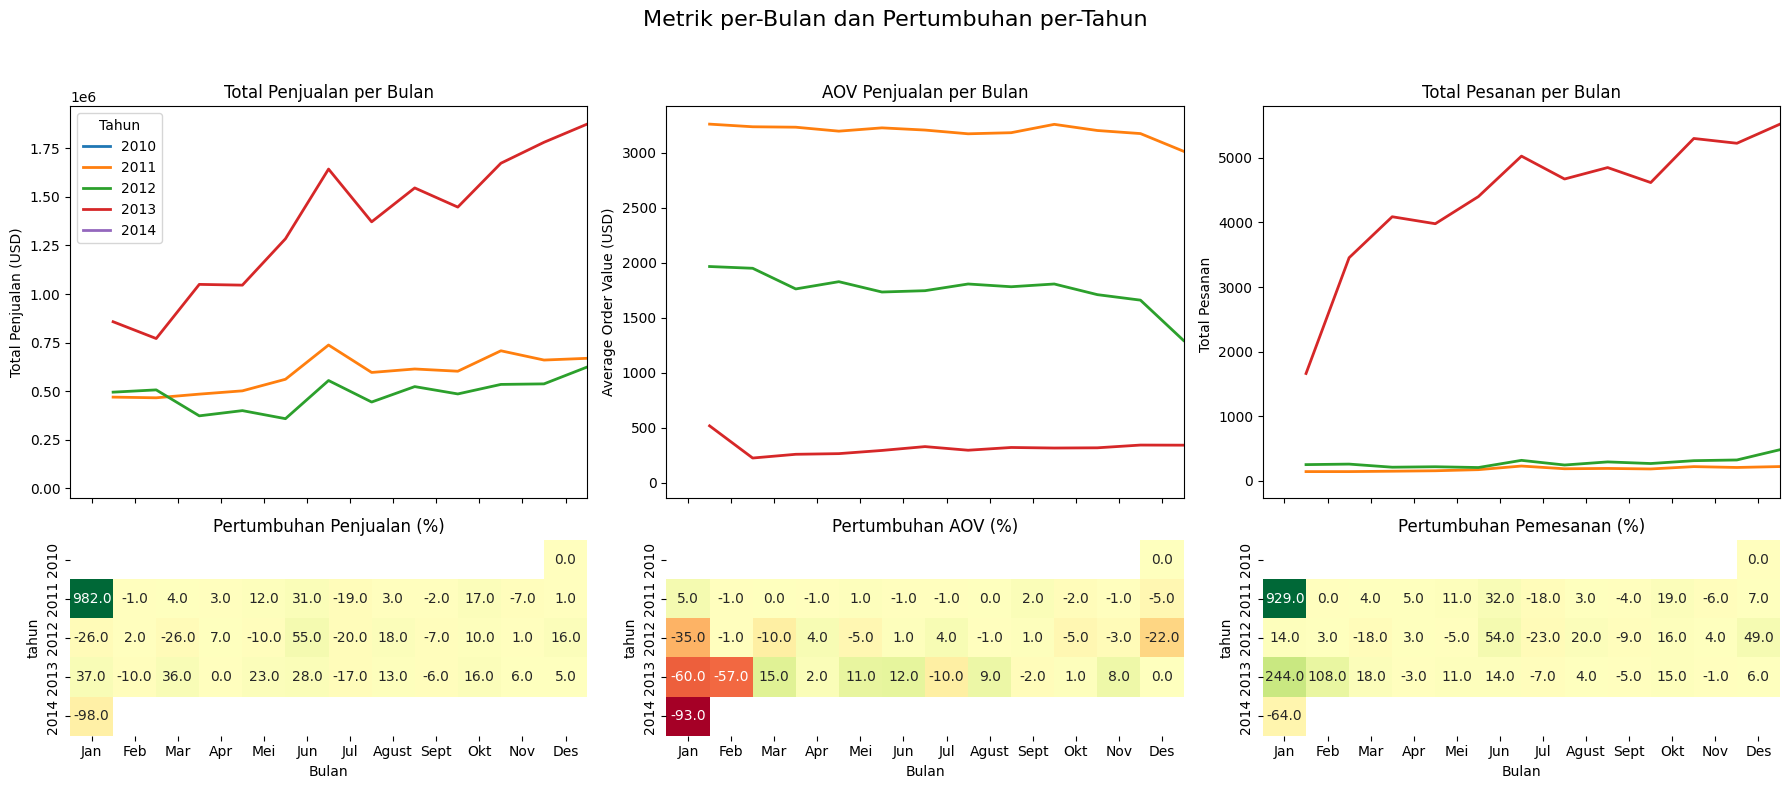

In [42]:
# Perbulan berdasarkan tahun

# Pisahkan antara bulan dan tahun
rangkuman_bulan['tahun'] = rangkuman_bulan.index.year
rangkuman_bulan['bulan'] = rangkuman_bulan.index.month

# visual dengan 2x3 kotak: 3 garis chart dan heatmap
fig, axes =  plt.subplots(2,3, figsize=(18, 8), sharex='col', gridspec_kw={'height_ratios':[2,1]})

# warna untuk tiap tahun
tahunan = rangkuman_bulan['tahun'].unique()
warna = plt.cm.tab10(np.arange(len(tahunan)))

# metrik
metrik = ["total_penjualan", "avg_penjualan", "total_pesanan"]
judul = ["Total Penjualan per Bulan", "AOV Penjualan per Bulan", 'Total Pesanan per Bulan']
y_labels = ["Total Penjualan (USD)", "Average Order Value (USD)", "Total Pesanan "]
metriks_pertumbuhan = ["pertumbuhan_penjualan", "pertumbuhan_aov", "pertumbuhan_pemesanan"]
judul_pertumbuhan = ["Pertumbuhan Penjualan (%)", "Pertumbuhan AOV (%)", "Pertumbuhan Pemesanan (%)"]

# plot line charts
for i, (metric, title, y_label) in enumerate(zip(metrik, judul, y_labels)):
  for j, tahun in enumerate(tahunan):
    data_tahunan = rangkuman_bulan[rangkuman_bulan["tahun"] == tahun]
    axes[0, i].plot(data_tahunan['bulan'], data_tahunan[metric], label=f"{tahun}", color=warna[j], linewidth=2)
  axes[0, i].set_title(title)
  axes[0, i].set_ylabel(y_label)
  axes[0, i].set_xticks(range(1,13))
  axes[0, i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sept", "Okt", "Nov", "Des"])
  if i == 0:
    axes[0, i].legend(title="Tahun", loc="upper left")

# Plot heatmap
for i, (metrik_pertumbuhan, judul_metrik) in enumerate(zip(metriks_pertumbuhan, judul_pertumbuhan)):
  data_pertumbuhan = rangkuman_bulan.pivot_table(index="tahun", columns='bulan', values=metrik_pertumbuhan)
  sns.heatmap(data_pertumbuhan, cmap="RdYlGn", ax=axes[1,i], cbar=False, annot=True, fmt=".1f", center=0)
  axes[1, i].set_title(judul_metrik)
  axes[1, i].set_xticks(np.arange(0.5,12))
  axes[1, i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sept", "Okt", "Nov", "Des"])
  axes[1, i].set_xlabel("Bulan")

# pengaturan terakhir
plt.suptitle("Metrik per-Bulan dan Pertumbuhan per-Tahun", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Pertumbuhan Perkualtal

In [43]:
# Rangkuman kuartal
rangkuman_kuartal = data_use.groupby(data_use["order_date"].dt.to_period("Q").rename("pembelian_per_kuartal")).agg(
    total_penjualan = ("price", "sum"),
    avg_penjualan = ("price", "mean"),
    total_pemesanan = ("order_number", "count")
)

# hitung pertumbuhan tiap kuartal untuk setiap metrik
rangkuman_kuartal["pertumbuhan_penjualan"] = rangkuman_kuartal["total_penjualan"].pct_change() * 100
rangkuman_kuartal["avg_penjualan"] = rangkuman_kuartal["avg_penjualan"].pct_change() * 100
rangkuman_kuartal["total_pemesanan"] = rangkuman_kuartal["total_pemesanan"].pct_change() * 100

# ubah beberapa format data
rangkuman_kuartal = rangkuman_kuartal.fillna(0).round(0).astype(int)

# visualisasi menggunakan gradasi warna berdasarkan data
gaya_kuartal = rangkuman_kuartal.style.format("{:,}").background_gradient(
    subset=["pertumbuhan_penjualan", "avg_penjualan", "total_pemesanan"],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

gaya_kuartal

,total_penjualan,avg_penjualan,total_pemesanan,pertumbuhan_penjualan
pembelian_per_kuartal,,,,
2010Q4,"43,419",0,0,0
2011Q1,"1,421,267",5,"3,029","3,173"
2011Q2,"1,801,482",-1,28,27
2011Q3,"1,814,273",0,1,1
2011Q4,"2,038,066",-2,15,12
2012Q1,"1,375,833",-39,11,-32
2012Q2,"1,314,332",-7,3,-4
2012Q3,"1,454,569",2,9,11
2012Q4,"1,697,497",-16,38,17


### Pertumbuhan Pertahun

In [44]:
# rangkuman tahun
rangkuman_tahun = data_use.groupby(data_use["order_date"].dt.to_period("Y").rename("penjualan_pertahun")).agg(
    total_penjualan = ("price", "sum"),
    avg_penjualan = ("price", "mean"),
    total_pemesanan = ("order_number", "count")
)

# kalkulasi pertumbuhan pertahun untuk setiap metrik
rangkuman_tahun["pertumbuhan_penjualan"] = rangkuman_tahun["total_penjualan"].pct_change() * 100
rangkuman_tahun["pertumbuhan_aov"] = rangkuman_tahun["avg_penjualan"].pct_change() * 100
rangkuman_tahun["pertumbuhan_pemesanan"] = rangkuman_tahun["total_pemesanan"].pct_change() * 100

# Isi NaN dengan 0, bulatkan nilai, dan ubah ke integer
rangkuman_tahun = rangkuman_tahun.fillna(0).round(0).astype(int)

# Gunakan gradiasi warna berdasarkan data
gaya_tahun = rangkuman_tahun.style.format("{:,}").background_gradient(
    subset = ["pertumbuhan_penjualan", "pertumbuhan_aov", "pertumbuhan_pemesanan"],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

gaya_tahun

,total_penjualan,avg_penjualan,total_pemesanan,pertumbuhan_penjualan,pertumbuhan_aov,pertumbuhan_pemesanan
penjualan_pertahun,,,,,,
2010,"43,419","3,101",14,0,0,0
2011,"7,075,088","3,193","2,216","16,195",3,"15,729"
2012,"5,842,231","1,720","3,397",-17,-46,53
2013,"16,344,338",310,"52,782",180,-82,"1,454"
2014,"45,642",23,"1,970",-100,-93,-96


### Pertumbuhan penjualan berdasarkan regional pelanggan

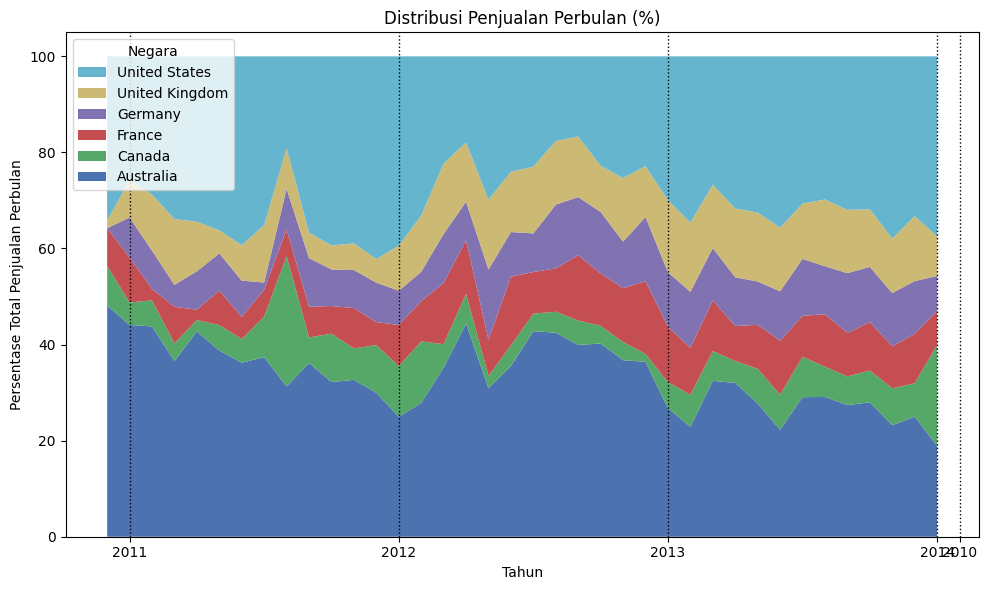

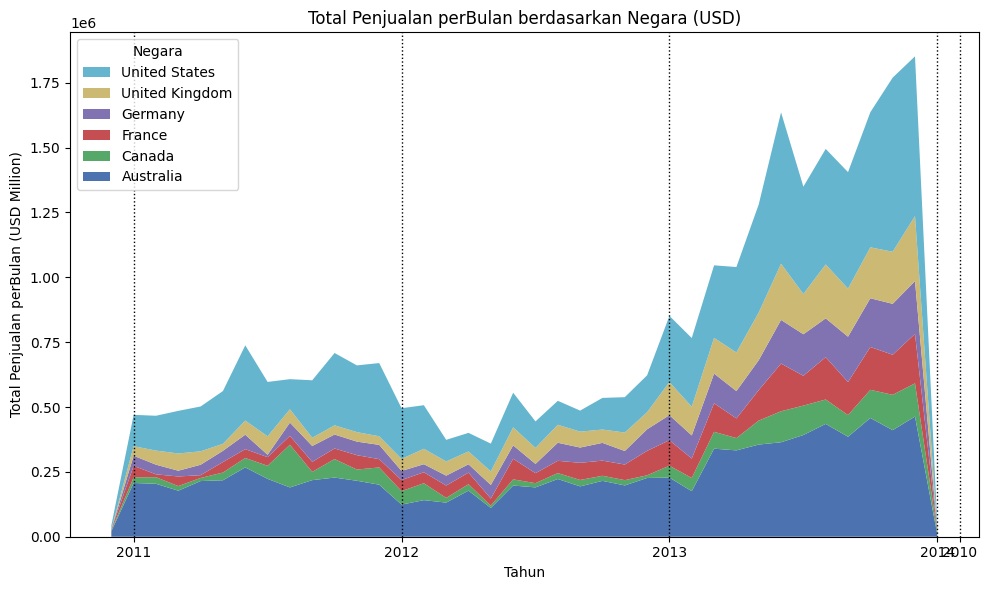

In [45]:
# Kelompokkan berdasarkan negara dan bulan untuk menghitung total penjualan per-bulan
penjualan_bulan = data_use.groupby([data_use["order_date"].dt.to_period("M"), "country"])["price"].sum().unstack(fill_value=0)

# normalisasi untuk mendapatkan persentase kontribusi untuk setiap negara
persentase_penjualan_bulan = penjualan_bulan.div(penjualan_bulan.sum(axis=1), axis=0) * 100

# buat function untuk plot area dengan tanda tahun
def plot_stacked_area(data, judul, ylabel):
  plt.figure(figsize=(10, 6))
  plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

  # tambahkan garis vertikal pada awal setiap tahun
  tahunan = sorted(data.index.year.unique())
  for tahun in tahunan:
    plt.axvline(x=f"{tahun}-01", color='black', linestyle=":", linewidth=1)

  # balikkan legend
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="upper left", title="Negara")

  # judul dan label
  plt.title(judul)
  plt.xlabel("Tahun")
  plt.ylabel(ylabel)

  # perlihatkan hanya tahun pada x-axis label
  plt.xticks([f"{tahun}-01" for tahun in tahunan], [str(tahun) for tahun in tahunan])

  plt.tight_layout()
  plt.show()


# plot persentase area
plt.style.use("seaborn-v0_8-deep")
plot_stacked_area(
    persentase_penjualan_bulan,
    judul="Distribusi Penjualan Perbulan (%)",
    ylabel = "Persentase Total Penjualan Perbulan"
)

# plot total penjualan
plot_stacked_area(
    penjualan_bulan,
    judul="Total Penjualan perBulan berdasarkan Negara (USD)",
    ylabel="Total Penjualan perBulan (USD Million)"
)

### Perbandingan pertumbuhan antar pelanggan berdasarkan kelas

In [51]:
data_use.columns

Index(['order_number', 'order_date', 'shipping_date', 'due_date',
       'sales_amount', 'quantity', 'price', 'customer_number', 'customer_name',
       'age', 'country', 'age_group', 'customer_class', 'first_order',
       'total_product', 'average_monthly_spend', 'product_name', 'category',
       'subcategory', 'cost', 'last_order', 'since_last_order',
       'product_class', 'lifespan_', 'total_orders', 'total_sales',
       'total_quantity', 'total_customer', 'average_order_value',
       'average_order_revenue', 'average_monthly_revenue'],
      dtype='object')

In [52]:
pelanggan_tahun = data_use.groupby(["customer_class", data_use["order_date"].dt.to_period("Y").rename("penjualan_tahun")]).agg(
    pemasukan = ("price", "sum"),
    pemesanan = ("order_number", "count"),
    aov = ("price", "mean")
)

# hitung pertumbuhan dengan format persentase
pelanggan_tahun["pertumbuhan_penjualan"] = pelanggan_tahun.groupby("customer_class")["pemasukan"].pct_change() * 100
pelanggan_tahun["pertumbuhan_pemesanan"] = pelanggan_tahun.groupby("customer_class")["pemesanan"].pct_change() * 100
pelanggan_tahun["pertumbuhan_aov"] = pelanggan_tahun.groupby("customer_class")["aov"].pct_change() * 100

# format data
pelanggan_tahun = pelanggan_tahun.fillna(0).round(0).astype(int)

# visualisasi
gaya_pelanggan_tahun = pelanggan_tahun.style.format("{:,}").background_gradient(
    subset=["pertumbuhan_penjualan", "pertumbuhan_pemesanan", "pertumbuhan_aov"],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

gaya_pelanggan_tahun

### Perbandingan pelanggan berdasarkan waktu

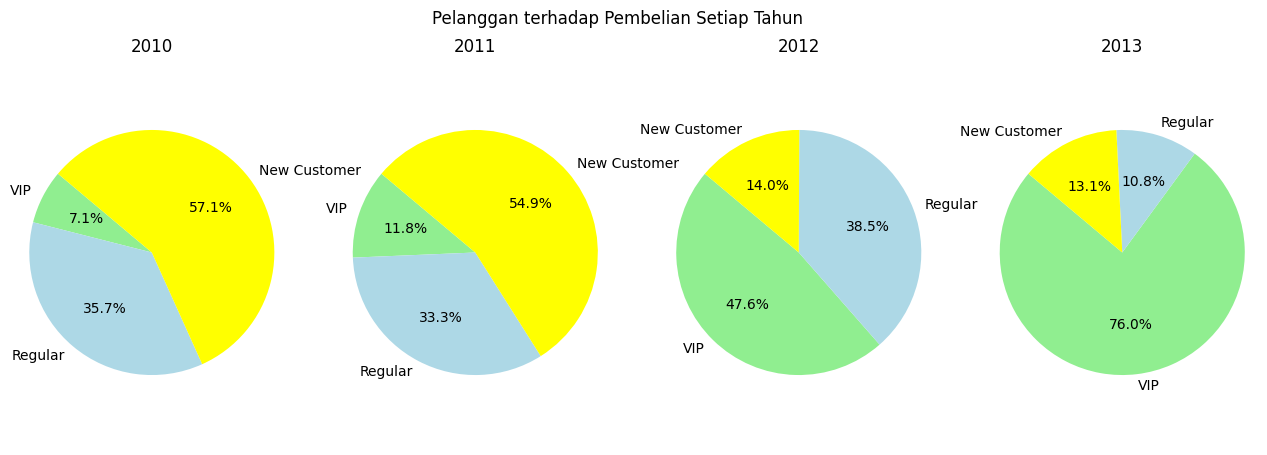

In [92]:
pelanggan_pie = data_use.groupby([data_use["order_date"].dt.year.rename("tahun"), "customer_class"])["order_number"].count().unstack()

# pelanggan_pie = pelanggan_pie.fillna(0).astype(int) -> jika ingin menyertakan 2014
pelanggan_pie = pelanggan_pie.dropna()

# set garis untuk subplot
num_tahun = pelanggan_pie.shape[0]
fig, axes = plt.subplots(1, num_tahun, figsize=(4*num_tahun, 5))

# Warna untuk setiap kelas pelanggan
warna=["lightgreen", "lightblue", "yellow"]

# loop untuk setiap tahun dan setiap kelas pelanggan
for i, (tahun, data) in enumerate(pelanggan_pie.iterrows()):
  ax=axes[i] if num_tahun > 1 else axes
  ax.pie(data, labels=["VIP", "Regular", "New Customer"], autopct="%1.1f%%",startangle=140, colors=warna)
  ax.set_title(int(tahun))
  ax.axis("equal")

# judul keseluruhan
fig.suptitle("Pelanggan terhadap Pembelian Setiap Tahun")

# layout
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

## Analisa Performa Produk

In [130]:
performa_sepeda_gunung = data_use.groupby("subcategory").agg(
    total_pemasukan=('price', 'sum'),
    total_pemasukan_pct=('price', lambda x: x.sum() / data_use['price'].sum() * 100),
    aov=('price', 'mean'),
    total_pemesanan=('order_number', 'count'),
    total_pemesanan_pct=('order_number', lambda x: x.count() / data_use['order_number'].count() * 100),
)

# urutkan berdasarkan total pemasukan dari yang tertinggi
performa_sepeda_gunung = performa_sepeda_gunung.sort_values(by='total_pemasukan', ascending=False)

# Round values to two decimal places
performa_sepeda_gunung = performa_sepeda_gunung.round(2)

# Apply background gradients and comma formatting
performa_sepeda_gunung_gaya = performa_sepeda_gunung.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_pemasukan_pct', 'total_pemesanan_pct'],
    cmap="Greens",  # White to Green gradient
    vmin=0
)

# Display the styled DataFrame
performa_sepeda_gunung_gaya

,total_pemasukan,total_pemasukan_pct,aov,total_pemesanan,total_pemesanan_pct
subcategory,,,,,
Road Bikes,"14,519,438.00",49.46,"1,799.63","8,068.00",13.36
Mountain Bikes,"9,952,254.00",33.90,"2,002.47","4,970.00",8.23
Touring Bikes,"3,844,580.00",13.10,"1,774.15","2,167.00",3.59
Tires and Tubes,"244,510.00",0.83,14.11,"17,329.00",28.69
Helmets,"225,400.00",0.77,35.00,"6,440.00",10.66
Jerseys,"172,984.00",0.59,51.92,"3,332.00",5.52
Shorts,"71,330.00",0.24,70.00,"1,019.00",1.69
Bottles and Cages,"56,878.00",0.19,7.13,"7,981.00",13.21
Fenders,"46,662.00",0.16,22.00,"2,121.00",3.51


Lihat performa produk sepeda jalan (sub kategori terbaik)

In [132]:
sepeda_jalan = data_use[data_use['subcategory'] == 'Road Bikes']

In [133]:
performa_sepeda_gunung = sepeda_jalan.groupby("product_name").agg(
    total_pemasukan=('price', 'sum'),
    total_pemasukan_pct=('price', lambda x: x.sum() / sepeda_jalan['price'].sum() * 100),
    aov=('price', 'mean'),
    total_pemesanan=('order_number', 'count'),
    total_pemesanan_pct=('order_number', lambda x: x.count() / sepeda_jalan['order_number'].count() * 100),
)

# urutkan berdasarkan total pemasukan dari yang tertinggi
performa_sepeda_gunung = performa_sepeda_gunung.sort_values(by='total_pemasukan', ascending=False)

# Round values to two decimal places
performa_sepeda_gunung = performa_sepeda_gunung.round(2)

# Apply background gradients and comma formatting
performa_sepeda_gunung_gaya = performa_sepeda_gunung.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_pemasukan_pct', 'total_pemesanan_pct'],
    cmap="Greens",  # White to Green gradient
    vmin=0
)

# Display the styled DataFrame
performa_sepeda_gunung_gaya

,total_pemasukan,total_pemasukan_pct,aov,total_pemesanan,total_pemesanan_pct
product_name,,,,,
Road-150 Red- 48,"1,205,786.00",8.30,"3,578.00",337.00,4.18
Road-150 Red- 62,"1,202,208.00",8.28,"3,578.00",336.00,4.16
Road-150 Red- 52,"1,080,556.00",7.44,"3,578.00",302.00,3.74
Road-150 Red- 56,"1,055,510.00",7.27,"3,578.00",295.00,3.66
Road-150 Red- 44,"1,005,418.00",6.92,"3,578.00",281.00,3.48
Road-250 Black- 52,"734,425.00",5.06,"2,302.27",319.00,3.95
Road-250 Red- 58,"702,666.00",4.84,"2,296.29",306.00,3.79
Road-250 Black- 48,"691,213.00",4.76,"2,319.51",298.00,3.69
Road-250 Black- 44,"628,384.00",4.33,"2,318.76",271.00,3.36
